<a href="https://colab.research.google.com/github/De-Par/Drop/blob/master/Max_Bipartite_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cplex docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 KB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docplex: filename=docplex-2.25.236-py3-none-any.whl size=671365 sha256=ca1356005d525552da4e58116afc39f04cee9bc9271c01c9a13ede63aaef30da
  Stored in directory: /root/.cache/pip/wheels/02/32/20/7f3f85d090da2c3b1ec41de83f17f426a05acc5d9f5e8a1c9f
Successfully built docplex


Решения солвера для n = 10:
[6, 4, 5, 8, 8, 5, 4, 5, 6, 7, 8, 6, 7, 6, 7, 6, 4, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 4, 6, 2, 6, 6, 6, 6, 3, 7, 4, 5, 6, 6, 5, 7, 3, 5, 6, 7, 6, 5, 5, 6, 5, 7, 4, 4, 6, 6, 6, 7, 3, 4, 3, 7, 5, 7, 6, 7, 6, 5, 6, 7, 6, 5, 6, 6, 7, 3, 5, 3, 8, 4, 8, 4, 4, 7, 5, 3, 6, 5, 8, 6, 8, 3, 7, 8, 7, 4]
Решения алгоритма Куна для n = 10:
[6, 4, 5, 8, 8, 5, 4, 5, 6, 6, 8, 6, 7, 6, 7, 6, 4, 6, 5, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 4, 6, 2, 6, 6, 6, 6, 3, 7, 4, 5, 6, 6, 5, 7, 3, 5, 6, 7, 6, 5, 5, 6, 5, 7, 4, 4, 6, 6, 6, 7, 3, 4, 3, 7, 5, 6, 6, 7, 6, 5, 6, 7, 6, 5, 6, 6, 7, 3, 5, 3, 8, 4, 8, 4, 4, 6, 5, 3, 6, 5, 8, 6, 8, 3, 5, 7, 7, 4]
Решения алгоритма Форда для n = 10:
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0

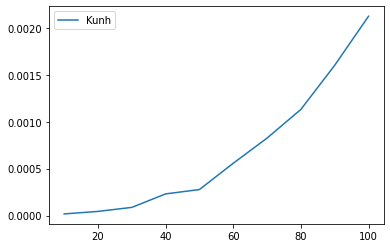

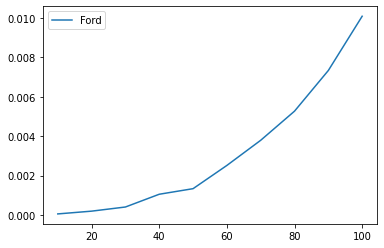

In [8]:
import cplex
import docplex
import time
import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model
from collections import defaultdict

class Ford_Fulkerson:

    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)

    def bfs(self, s, t, parent):
        visited = [False]*(self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1]*(self.ROW)
        max_flow = 0

        while self.bfs(source, sink, parent):
            path_flow = float("inf")
            s = sink

            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]
            max_flow += path_flow
            v = sink

            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
        return max_flow

##########################
#       functions        #
##########################

def create_adjy_mat():
    n = num_of_vert
    graph = [[0]*n for j in range(n)]

    for j in range(n):
        for k in range(n):
            graph[j][k] = np.random.choice(np.arange(0, 2), p=[0.9, 0.1])
    return graph

def solve_with_cplex():
    global cplex_time0
    n = num_of_vert
    matching_model = Model("matching")
    x = matching_model.binary_var_list(n*n, name="x")
    obj_fn = sum(x[i + n*j]*graph[j][i] for j in range(n) for i in range(n))

    for i in range(n):
        matching_model.add_constraint(sum(x[i + n*j] for j in range(n)) <= 1)
        matching_model.add_constraint(sum(x[j + n*i] for j in range(n)) <= 1)

    matching_model.set_objective("max", obj_fn)
    start = time.time()
    sol = matching_model.solve()
    cplex_time0 += time.time() - start

    return (int(sol.objective_value))

def create_list_of_edges():
    n = num_of_vert
    list_of_edges = []

    for i in range(n):
        list_of_edges.append([j for j in range(n) if graph[i][j] == 1])
    return list_of_edges

def dfs(v, used, mt):
    if used[v]:
        return False

    used[v] = True
    for u in graph[v]:
        if (mt[u] == -1 or dfs(mt[u], used, mt)):
            mt[u] = v
            return True
    return False

def solve_with_Kuhns_alg():
    n = num_of_vert
    mt = [-1]*n
    cnt = 0

    for i in range(n):
        used = [0]*n
        if (dfs(i, used, mt)):
            cnt += 1
    return cnt

def solve_with_Ford_alg(gr, num_vert):
    g = Ford_Fulkerson(gr)
    return g.ford_fulkerson(0, num_vert - 1)

##########################
#       main code        #
##########################

cplex_solutions, Kunh_solutions, Ford_solutions = [], [], []
cplex_time, Kunh_time, Ford_time = [], [], []

for num_of_vert in range(10, 100 + 1, 10):
    cplex_solutions_ex, Kunh_solutions_ex, Ford_solutions_ex = [], [], []
    cplex_time0, Kunh_time0, Ford_time0 = 0, 0, 0
  
    for N in range(100):
        graph = create_adjy_mat()

        if (num_of_vert < 40):
            cplex_solutions_ex.append(solve_with_cplex())

        start = time.time()
        Ford_solutions_ex.append(solve_with_Ford_alg(graph, num_of_vert))
        Ford_time0 += time.time() - start

        # print(solve_with_cplex())
        # for k in range(num_of_vert):
        #  print(graph[k])
        graph = create_list_of_edges()
        # print(graph)
        start = time.time()
        Kunh_solutions_ex.append(solve_with_Kuhns_alg())
        Kunh_time0 += time.time() - start
        # print()

    # cplex_time.append(cplex_time0 / 100)
    Kunh_time.append(Kunh_time0 / 100)
    Ford_time.append(Ford_time0 / 100)

    cplex_solutions.append(cplex_solutions_ex)
    Kunh_solutions.append(Kunh_solutions_ex)
    Ford_solutions.append(Ford_solutions_ex)

for i in range(1, 10 + 1):
    print(f"Решения солвера для n = {i*10}:")
    print(cplex_solutions[i - 1])
    print(f"Решения алгоритма Куна для n = {i*10}:")
    print(Kunh_solutions[i - 1])
    print(f"Решения алгоритма Форда для n = {i*10}:")
    print(Ford_solutions[i - 1])
    print()

# print(Ford_solutions)
# print(cplex_time)

print(Kunh_time)
sample_size = [10*i for i in range(1, 11)]

#plt.plot(sample_size, cplex_time, label = "solver")
print("\n")
plt.plot(sample_size, Kunh_time, label="Kunh")
plt.legend()
plt.show()

print("\n")
plt.plot(sample_size, Ford_time, label="Ford")
plt.legend()
plt.show()